### MNIST 딥러닝 모델 예제

- 손으로 쓴 숫자들로 이루어진 이미지 데이터셋
- 기계 학습 분야의 트레이닝 및 테스트에 널리 사용되는 데이터
- keras.datasets에 기본으로 포함되어 있는 데이터셋

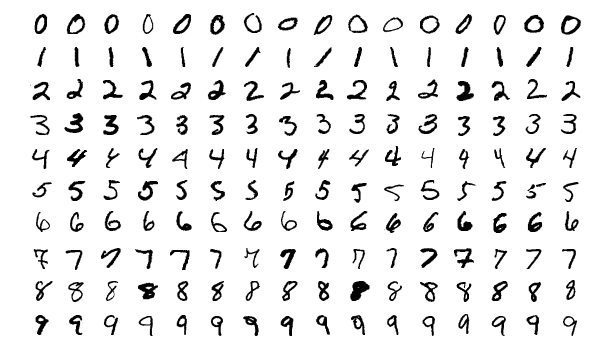

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253

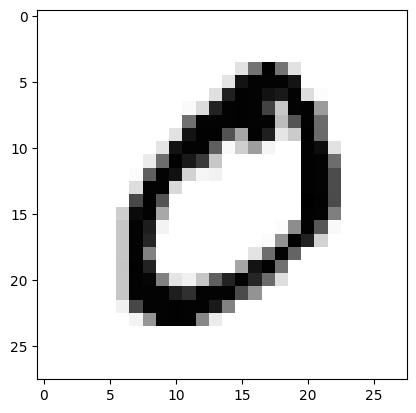

241

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

mnist = tf.keras.datasets.mnist

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
# 0 - 9 digits recognition = 10 classes

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

print (x_train[0].shape)
print (x_train[0])
print (y_train[0])

def show_data(arr):
    plt.imshow(arr, cmap=plt.cm.binary)

    reshape_data = arr.reshape(-1, )
    for index, data in enumerate(reshape_data):
        print('{:3d}'.format(data), end='')
        if index % 28 == 27:
            print()

show_data(x_train[0])

plt.imshow(x_train[1], cmap='Greys', interpolation='None')
plt.show()

y_train[1]

x_train[0][13][13]

# MNIST - Single layer

In [3]:
import tensorflow as tf

learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# change data shape
print(x_train.shape)  # (60000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

# change result to one-hot encoding
# in tf1, one_hot= True in read_data_sets("MNIST_data/", one_hot=True)
# took care of it, but here we need to manually convert them
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
# array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows
#  stays the same. to_categorical(labels)
# array([[ 1.,  0.,  0.],
#        [ 0.,  0.,  1.],
#        [ 0.,  1.,  0.],
#        [ 0.,  0.,  1.],
#        [ 1.,  0.,  0.]], dtype=float32)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=10, input_dim=x_train.shape[1], activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(0.001), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)


predictions = tf.model.predict(x_test)
predictions[0]

print('Prediction: \n', predictions)
x_train
score = tf.model.evaluate(x_train, y_train)
score2 = tf.model.evaluate(x_test, y_test)
print('Accuracy: ', score2[1])



(60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
600/600 [==============================] - 1s 1ms/step - loss: 0.6286 - accuracy: 0.8426
Epoch 2/15
600/600 [==============================] - 1s 1ms/step - loss: 0.3459 - accuracy: 0.9064
Epoch 3/15
600/600 [==============================] - 1s 1ms/step - loss: 0.3094 - accuracy: 0.9146
Epoch 4/15
600/600 [==============================] - 1s 1ms/step - loss: 0.2921 - accuracy: 0.9186
Epoch 5/15
600/600 [==============================] - 1s 1ms/step - loss: 0.2818 - accuracy: 0.9218
Epoch 6/15
600/600 [============

# MNIST - Multi layer

In [ ]:
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)


tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=x_train.shape[1], units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

print(tf.model.trainable_weights)
a = tf.model.trainable_weights


# Initialization

In [ ]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, kernel_initializer='he_normal', activation='relu',use_bias=False))
tf.model.add(tf.keras.layers.Dense(units=256, kernel_initializer='he_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='he_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


# Deep neural network

In [ ]:

import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

# About batch size: https://eehoeskrap.tistory.com/445, https://arxiv.org/pdf/1804.07612.pdf (Citation: 491 at 2022-02-08)



# Dropout

In [4]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10
drop_rate = 0.3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

print(tf.model.trainable_weights)

(60000, 28, 28)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 51

## 과소적합(Underfitting) / 과대적합(Overfitting)

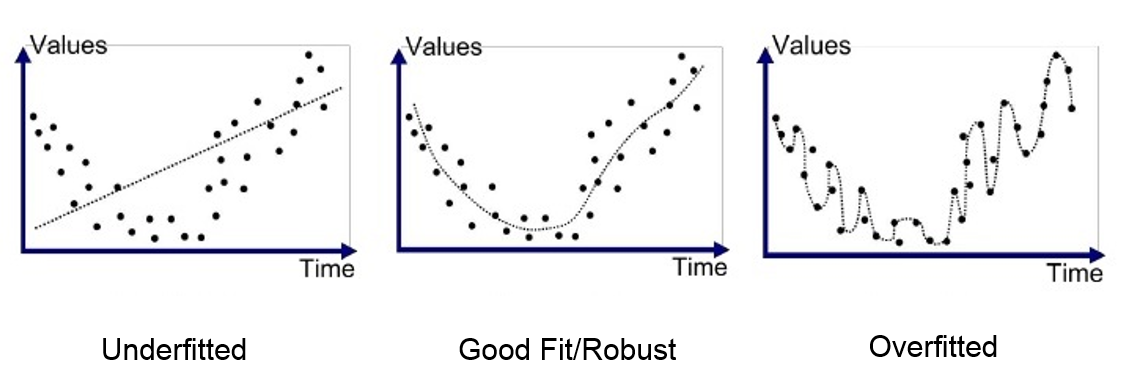

### 과소적합 (Underfitting)

- 학습 데이터를 충분히 학습하지 않아 성능이 매우 안 좋은 경우
- 모델이 지나치게 단순한 경우
- 해결 방안
  - 충분한 학습 데이터 수집
  - 보다 더 복잡한 모델 사용
  - 에폭수(epochs)를 늘려 충분히 학습

### 과대적합 (Overfitting)

- 모델이 학습 데이터에 지나치게 맞추어진 상태
- 새로운 데이터에서는 성능 저하
- 데이터에는 잡음이나 오류가 포함
- 학습 데이터가 매우 적을 경우
- 모델이 지나치게 복잡한 경우
- 학습 횟수가 매우 많을 경우
- 해결방안
  - 다양한 학습 데이터 수집 및 학습
  - 모델 단순화: 파라미터가 적은 모델을 선택하거나, 학습 데이터의 특성 수를 줄임
  - 정규화(Regularization)을 통한 규칙 단순화
  - 적정한 하이퍼 파라미터 찾기

### 과대적합(overfitting)과 과소적합(underfitting) 방지 방법

* 모델의 크기 축소
* 가중치 초기화(Weight Initializer)
* 옵티마이저(Optimizer)
* 배치 정규화(Batch Normalization)
* 규제화(Regularization)
* 드롭아웃(Dropout)

## 모델 크기 조절

- 가장 단순한 방법
- 모델의 크기를 줄인다는 것은 학습 파라미터의 수를 줄이는 것


## 옵티마이저(Optimizer)

### 확률적 경사하강법(Stochastic Gradient Descent, SGD)

* 전체를 한번에 계산하지 않고, **확률적**으로 일부 샘플을 뽑아 조금씩 나누어 학습을 시키는 과정  
* 반복할 때마다 다루는 데이터의 수가 적기때문에 한 번 처리하는 속도는 빠름  
* 한 번 학습할 때 필요한 메모리만 있으면 되므로 매우 큰 데이터셋에 대해서도 학습이 가능
* 확률적이기 때문에, 배치 경사하강법보다 불안정
* 손실함수의 최솟값에 이를 때까지 다소 위아래로 요동치면서 이동
* 따라서, 위와 같은 문제 때문에 **미니 배치 경사하강법**(mini-batch gradient descent)로 학습을 진행
* 요즘에는 보통 SGD라고하면 미니 배치 경사하강법을 의미하기도 함
* SGD의 단점: 단순하지만 문제에 따라서 시간이 매우 오래걸림
* SGD 수식

  $\quad W \leftarrow W - \gamma \frac{\partial L}{\partial W}$  
   - $\gamma :\ $ 학습률

  





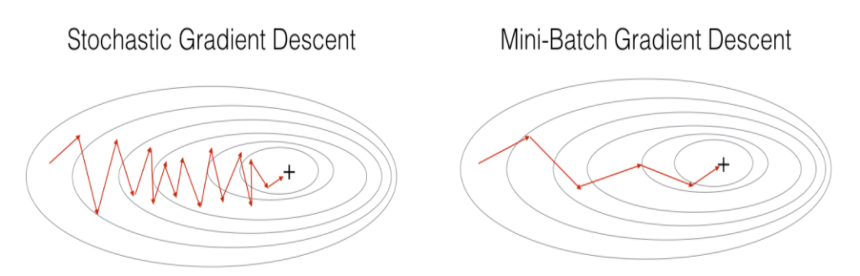

### Momentum

- 운동량을 의미, 관성과 관련
- 공이 그릇의 경사면을 따라서 내려가는 듯한 모습
- 이전의 속도를 유지하려는 성향
- 경사하강을 좀 더 유지하려는 성격을 지님
- 단순히 SGD만 사용하는 것보다 적게 방향이 변함
* Momentum 수식

  $
  \qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \ v
  $
  - $\alpha\ $ : 관성계수
  - $v$ :  속도
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분




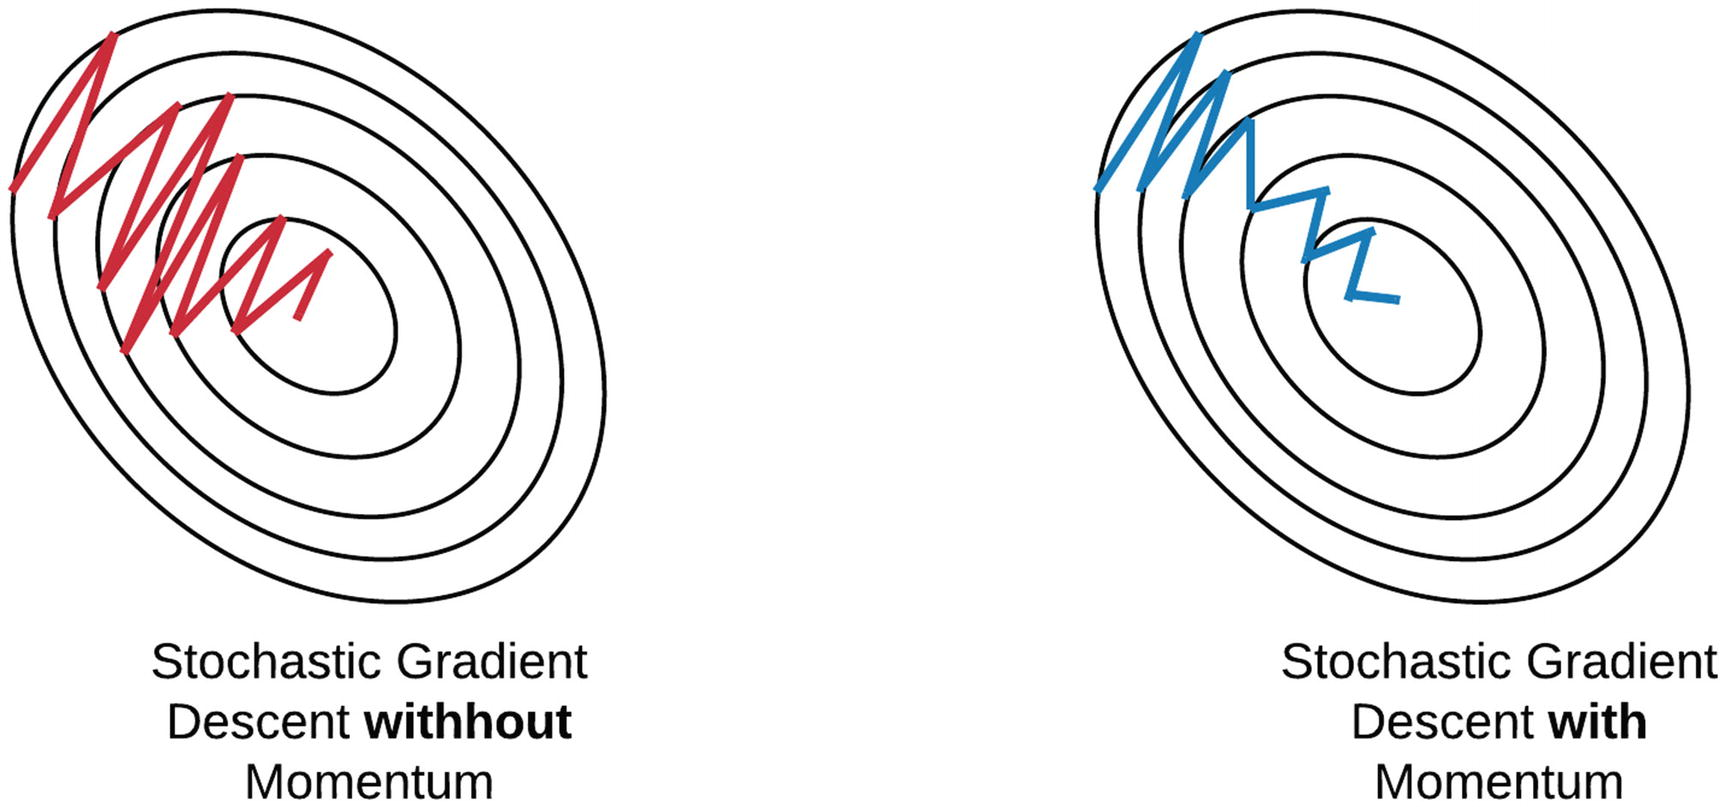

### Nesterov

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- Nesterov 수식

  $
  \qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
  \qquad \theta \ \leftarrow \ \theta \ + m
  $

  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\eta\ $ : 학습률
  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

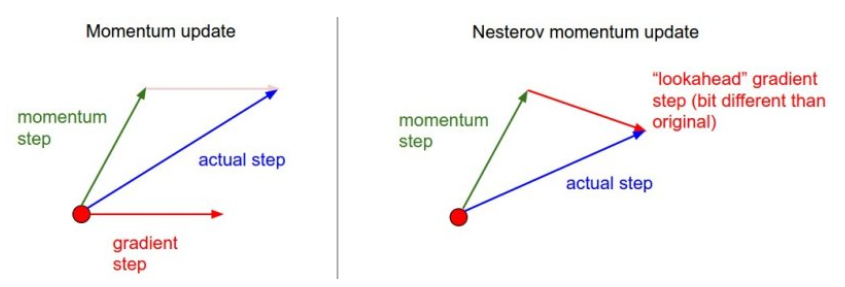

### AdaGrad(Adaptive Gradient)

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키며 진행하며 적응적 학습률이라고도 부름
- 경사가 급할 때는 빠르게 변화, 완만할 때는 느리게 변화
- 간단한 문제에서는 좋을 수는 있지만 딥러닝(Deep Learning)에서는 자주 쓰이지 않음
- 학습률이 너무 감소되어 전역최소값(global minimum)에 도달하기 전에 학습이 빨리 종료될 수 있기 때문
- AdaGrad 수식

  $
  \qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
  $
  - $h\ $ : 기존 기울기를 제곱하여 더한 값
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분
  - 과거의 기울기를 제곱하여 계속 더해하기 때문에 학습을 진행할수록 갱신 강도가 약해짐 ($\because \frac{1}{\sqrt h}$)    
  

### RMSProp (Root Mean Square Propagation)

- AdaGrad를 보완하기 위한 방법으로 등장
- 합 대신 지수의 평균값을 활용
- 학습이 안되기 시작하면 학습률이 커져서 잘 되게하고, 학습률이 너무 크면 학습률을 다시 줄임
- RMSProp 수식

  $
  \qquad h \ \leftarrow \  \rho \ h + (1 - \rho)\ \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad W \ \leftarrow \ W \ + \gamma \frac{\partial L}{\partial W} / \ \sqrt{h + \epsilon}
  $
  - $h\ $ : 기존 기울기를 제곱하여 업데이트 계수를 곱한 값과 업데이트 계수를 곱한 값을 더해줌
  - $\rho\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

### Adam (Adaptive Moment Estimation)

- 모멘텀 최적화와 RMSProp의 아이디어를 합친 것
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그레디언트 제곱의 지수 감소된 평균(RMSProp)을 따름
- 가장 많이 사용되는 최적화 방법
- Adam 수식

  $
  \qquad t \ \leftarrow \ t + 1 \\
  \qquad m_t \ \leftarrow \  \beta_1 \ m_{t-1} - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
  \qquad v_t \ \leftarrow \ \beta_2 \ v_{t-1} + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
  \qquad \hat{m_t} \ \leftarrow \frac{m_t}{1 - \beta_1^t} \\
  \qquad \hat{v_t} \ \leftarrow \frac{v_t}{1 - \beta_2^t} \\
  \qquad W_t \ \leftarrow \ W_{t-1} \ + \gamma \ \hat{m_t}\  / \sqrt{\hat{v_t} + \epsilon}
  $
  - $\beta\ $ : 지수 평균의 업데이트 계수
  - $\gamma\ $ : 학습률
  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$
  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

### 최적화 Optimizer 비교

<img src="https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif" width="700">

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

## 가중치 초기화(Weights Initialization)

* 가중치 초기화 시각화: https://www.deeplearning.ai/ai-notes/initialization/

### 가중치 소실(Gradient Vanishing)

- 활성화함수가 Sigmoid 함수 일 때, 은닉층의 갯수가 늘어 날수록 가중치가 역전파되면서 가중치 소실문제 발생
  - 0 ~ 1 사이의 값으로 출력되면서 0 또는 1에 가중치 값이 퍼짐  
    이는 <u>미분값이 점점 0에 가까워짐</u>을 의미하기도 함
  - **ReLU 함수 등장(비선형 함수)**

- 가중치 초기화 문제(은닉층의 활성화값 분포)
  - 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값이 치우치게 되고, 표현할 수 있는 신경망의 수가 적어짐
  - 따라서, 활성화값이 골고루 분포되는 것이 중요

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F278186%2Fd158ec3585bc1551d9f3a03ae13a3a73%2Fvanishing%20gradient%20problem.png?generation=1574233763365617&alt=media)

###  선형 함수에서 가중치 초기화

#### 초기값 : 0 (zeros)

- 학습이 올바르게 진행되지 않음
- 0으로 설정하면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신됨

#### 초기값 : 균일분포(Uniform)

- 활성화 값이 균일하지 않음(활성화함수 : sigmoid)
- 역전파로 전해지는 기울기값이 사라짐

#### 초기값 : 정규분포(nomalization)

- 활성화함수를 통과하면 양쪽으로 퍼짐
- 0과 1에 퍼지면서 기울기 소실문제(gradient vanishing) 발생

#### 초기값 : Xavier (Glorot)

- 은닉층의 노드의 수가 n이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포
- 더 많은 가중치에 역전파가 전달 가능하고, 비교적 많은 문제를 표현할 수 있음
- 활성화 함수가 **선형**인 함수일 때 매우 적합

#### 초기값 : Xavier (Glorot) - tanh

- 활성화 함수: tanh
- sigmoid 함수보다 더 깔끔한 종모양으로 분포  


### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

## 드롭아웃(Dropout)

- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법
- 과적합을 방지하기 위한 방법
- 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용
- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜** $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]
  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨
- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않고, 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

  <img src="https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png" width="600">